<a href="https://colab.research.google.com/github/roner-rodrigues/AI-ML/blob/main/Perceptron_Sklearn_Bancario_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron Simples com Sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [2]:
from sklearn import preprocessing # biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # biblioteca para separação de amostras para treino e teste
from sklearn.linear_model import Perceptron # biblioteca com funções para a execução da RNA Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics # biblioteca para obtenção de métricas para avaliação dos modelos
import matplotlib.pyplot as plt # biblioteca para plotar gráfico
import numpy as np
import pandas as pd
import random # biblioteca aplicada na geração de números randômicos
from google.colab import drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Mounted at /content/drive


In [3]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/bancario.csv")

# separando a coluna da classe das 100 primeiras amostras do dataset
y = df.iloc[1:, 3].values

# substituindo o valor string em numérico, baseado no que determina a função de ativação
y = np.where(y == 'mau', -1, 1)

# separando as colunas com as variáveis das 100 primeiras amostras do dataset para determinar os inputs da RNA
X = df.iloc[1:, [1,2]].values

# print(y.shape)
# print(X.shape)

In [4]:

# Variáveis que armazenam os valores máximos para normalização manual na validação individual
maxXRenda = X[1:,0].max()
maxXDivida = X[1:,1].max()

# normalização dos dados sklearn - dados entre 0 e 1 - https://pt.linux-console.net/?p=5847
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
# print(X)

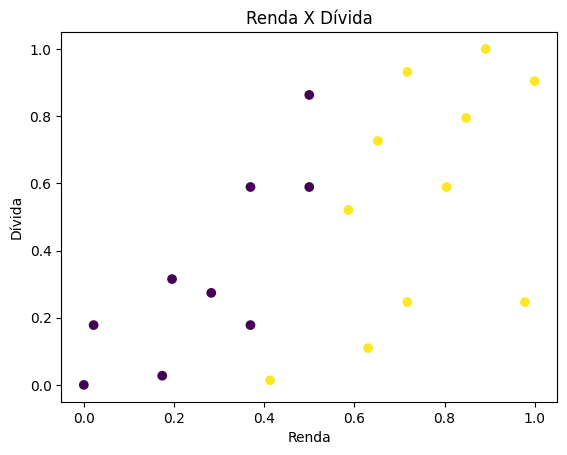

In [5]:
# plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Renda X Dívida")
plt.xlabel('Renda')
plt.ylabel('Dívida')
plt.show()

In [6]:
# separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

# print(X_train.shape)
# print(X_test.shape)

In [7]:
# p = Perceptron(random_state=42, eta0=0.0001, alpha=0.1)
p = Perceptron(max_iter=100, alpha=0.01, n_iter_no_change=10) # Criação do objeto Perceptron

p.fit(X_train, y_train) # Treinamento do Perceptron

Perceptron(alpha=0.01, max_iter=100, n_iter_no_change=10)

In [8]:
predictions_train = p.predict(X_train) # validação do conjunto de amostras treinadas
train_score = accuracy_score(predictions_train, y_train) # avaliação de acurácia da classificação das amostras que foram apresentadas no treinamento
print("Acurácia com dados de treinamento: ", train_score)

predictions_test = p.predict(X_test) # validação do conjunto de amostras que não participaram do treinamento
train_score = accuracy_score(predictions_test, y_test) # avaliação de acurácia da classificação das amostras que foram apresentadas no treinamento
print("Acurácia com dados de treinamento: ", train_score)

print(classification_report(predictions_test, y_test))

print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia com dados de treinamento:  1.0
Acurácia com dados de treinamento:  1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Número de épocas no treinamento:  13
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.01, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 100, 'n_iter_no_change': 10, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


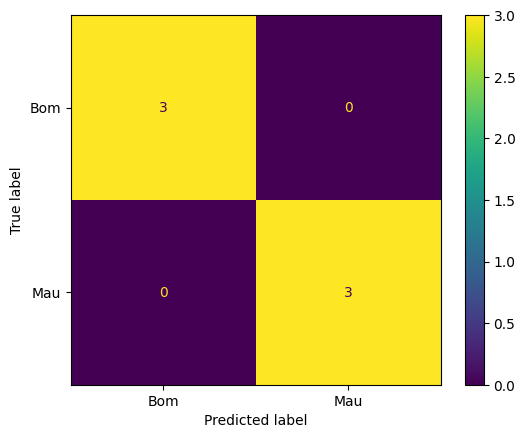

In [9]:
# Apresentação gráfica da matriz de confusão dos testes classificados
conf_matrix = confusion_matrix(y_test, predictions_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Bom', 'Mau'])
cm_display.plot()
plt.show()

In [10]:
# Teste individual de amostras
# Teste individual de amostras
rendaA = 5000
dividaA = 500
rendaB = 3000
dividaB = 500

# Normalizando manualmente amostras isoladas
rendaA = rendaA/maxXRenda
rendaB = rendaB/maxXRenda
dividaA = dividaA/maxXDivida
dividaB = dividaB/maxXDivida

print([rendaA, dividaA])

A = np.array([rendaA, dividaA]) # Padrão correto = 1
A_y = np.array([1])
B = np.array([rendaB, dividaB]) # Padrão correto = -1
B_y = np.array([1])

prediction_A = p.predict([A])
prediction_B = p.predict([B])
score_A = accuracy_score(prediction_A, A_y)
print("Acurácia com dados de A: ", score_A)
score_B = accuracy_score(prediction_B, B_y)
print("Acurária com dados de B: ", score_B)

[1.8181818181818181, 0.625]
Acurácia com dados de A:  1.0
Acurária com dados de B:  1.0
